In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import numpy as np
import astropy.units as u
from jscon import make_image as mk
from jscon import parameter_load
import scipy.integrate as integrate
from scipy import interpolate
import importlib
importlib.reload(mk)

para_file = "../params/para_yajiri.dat"
dic_params = parameter_load.load_params(para_file )
n_core = int(dic_params["n_core"])
diameter = dic_params["diameter"] 
lambda_now = dic_params["lambda_now"]* 10**-6
sigma_ace = dic_params["sigma_ace"]
pix_arcsec = dic_params["pix_arcsec"]                  
time_ref = dic_params["time_ref"]   
time_start = dic_params["time_start"]  
time_end = dic_params["time_end"]  
time_sample_num = dic_params["time_sample_num"]  
sky_dir_l = dic_params["sky_dir_l"] - 180
sky_dir_b = dic_params["sky_dir_b"]  
xmax = int(dic_params["xmax"] )
ymax = int(dic_params["ymax"] )
file_catalog = str(dic_params["catalog"])
ext_size = int(dic_params["ext_size"])

In [12]:
df = mk.get_catalog_info_for_making_stars(file_catalog)
mask_hwmag = df["hwmag"] < 14.5
hwmag_targets = df["hwmag"] 
c = SkyCoord(df["ra"].values, df["dec"].values, frame="icrs", unit="deg")
gal_l = c.galactic.l.deg-180
gal_b = c.galactic.b.deg
hwmag = df["hwmag"]


/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [13]:
gal_l_min = sky_dir_l
gal_l_max = sky_dir_l +2
gal_b_min = sky_dir_b
gal_b_max =sky_dir_b + 2

make_new_stars(gal_l_min, gal_l_max, gal_b_min, gal_b_max, \
               gal_l, gal_b , hwmag, out_file = "./stellar_catalog.csv")



,ra,dec,hwmag
0,87.310747,29.488333,19.194734
1,88.921616,29.966849,18.015009
2,88.727654,28.899903,18.686496
3,87.381705,29.424832,19.317541
4,88.010574,28.442622,16.692639
...,...,...,...
9783976,89.823236,28.833024,18.870264
9783977,88.071170,27.857430,14.655259
9783978,88.022789,28.784690,17.533071
9783979,89.001961,28.500003,15.781739


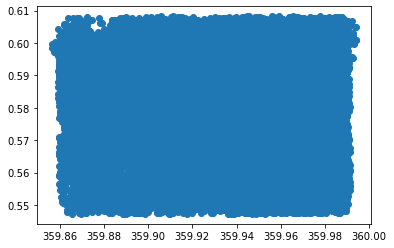

In [5]:
plt.scatter(gal_l, gal_b)